Problem statement:
    Ayurveda- the oldest medical system known to mankind, treats the person using herbs. This traditional science strongly believes that the diseases are due to an imbalance in Body humors called- Doshas. If these Doshas increases, they will cause disease. To treat the disease, Ayurveda uses various herbs (and some minerals too). These herbs act on the Doshas through-
Rasa (taste): The taste of the drug will have an influence on Doshas. Ex. Sweet taste (madhura Rasa) will decrease the Vata and Pitta

Guna (Properties): Certain properties like oiliness, heaviness will increase Kapha

Veerya (Potency): It can be of Usha (hot) or Sheeta (Cold) rarely Anushna (either hot or cold) that will have an impact on Doshas

Vipaka (Final transformation): It can be of Madhura (sweet), Amla (sour), and Katu (pungent- hot taste)

Dosha: The overall outcome of any drug can be understood as VS (Vata shamaka- decreases Vata), PS (Pitta shamaka- decreases Pitta), KS(Kapha shamaka- decreases Kapha), TS (Tridosha shamaka- decreases Vata, Pitta and Kapha), VPS (Vata Pitta shamaka- decreases Vata and Pitta), VKS (Vata Kapha shamaka- decreases Vata and Kapha), PKS (Pitta Kapha shamaka- decreases Pitta and Kapha)

So, in the given data set, Dosha is the target variable i.e we try to understand that which of the above components- Rasa, Guna, Veerya, Vipaka, will have an impact on Doshas

### Step1 : Reading and understanding the data  

In [1]:
# importing the required libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Reading the dataset and storing it in a new dataframe 'data'

data = pd.read_csv('food_drug_rgvv.csv')

In [4]:
data.head()

No        Name                   Latin Catogery    Guna1    Guna2    Rasa1  \
0   1      Aadaki        Cajanus indicus      Food   ruksha   sheeta  madhura   
1   2       Agaru     Aquilaria agallocha     Drug  tikshna    laghu     katu   
2   3     Agastya    Sesbenia grandiflora     Drug    laghu   ruksha    tikta   
3   4  Agnimantha  Clerodendron phlomides     Drug    laghu   ruksha     katu   
4   5    Ahiphena      Papaver somniferum     Drug    laghu  sukshma    tikta   

     Rasa2  Veerya   Vipaka Dosha  
0  kashaya  sheeta  madhura   PKS  
1    tikta   ushna     katu   VKS  
2  kashaya  sheeta     katu   PKS  
3    tikta   ushna     katu   VKS  
4  kashaya  sheeta  madhura    PS

In [5]:
data.shape

(289, 11)

In [6]:
data.value_counts()

No   Name         Latin                   Catogery  Guna1   Guna2    Rasa1    Rasa2    Veerya  Vipaka   Dosha
1    Aadaki       Cajanus indicus         Food      ruksha  sheeta   madhura  kashaya  sheeta  madhura  PKS      1
146  Kupilu       Strychnos nux-vomica    Drug      ruksha  laghu    tikta    katu     ushna   katu     VKS      1
198  Parnayavani  Coleus amboinicus       Drug      laghu   ruksha   katu     tikta    ushna   katu     VKS      1
197  Parnabija    Bryophyllum pinnatum    Drug      laghu   ruksha   kashaya  amla     sheeta  madhura  VPS      1
196  Parisha      Thespesia populnea      Drug      ruksha  laghu    madhura  kashaya  sheeta  katu     VPS      1
                                                                                                                ..
97   Japa         Hibiscus rosa-sinensis  Drug      laghu   snigdha  kashaya  madhura  sheeta  katu     PKS      1
96   Jambu        Eugenia jambolana       Drug      laghu   ruksha   kashaya  madhura

### Step2 : Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        289 non-null    int64 
 1   Name      289 non-null    object
 2   Latin     289 non-null    object
 3   Catogery  289 non-null    object
 4   Guna1     289 non-null    object
 5   Guna2     289 non-null    object
 6   Rasa1     289 non-null    object
 7   Rasa2     289 non-null    object
 8   Veerya    289 non-null    object
 9   Vipaka    289 non-null    object
 10  Dosha     289 non-null    object
dtypes: int64(1), object(10)
memory usage: 25.0+ KB


In [8]:
# checking uniquness of distribution  

In [9]:
data['Guna1'].value_counts()

laghu      164
guru        58
ruksha      32
snigdha     16
tikshna     15
sheeta       2
sara         1
ushna        1
Name: Guna1, dtype: int64

In [10]:
data['Guna2'].value_counts()

ruksha      118
snigdha      80
laghu        32
tikshna      25
guru         15
sara         10
sheeta        5
picchila      2
sukshma       1
vishada       1
Name: Guna2, dtype: int64

In [11]:
data['Rasa1'].value_counts()

tikta      82
madhura    77
katu       64
kashaya    54
amla       12
Name: Rasa1, dtype: int64

In [12]:
data['Rasa2'].value_counts()

tikta      111
kashaya     94
katu        39
madhura     36
amla         8
lavana       1
Name: Rasa2, dtype: int64

In [13]:
data['Vipaka'].value_counts()

katu       178
madhura    104
amla         7
Name: Vipaka, dtype: int64

In [14]:
data['Veerya'].value_counts()

ushna      153
sheeta     130
anushna      6
Name: Veerya, dtype: int64

In [15]:
data['Dosha'].value_counts()

VKS    104
PKS     78
VPS     48
TS      40
PS       7
VS       7
KS       5
Name: Dosha, dtype: int64

In [16]:
data.Dosha.value_counts(normalize=True)

VKS    0.359862
PKS    0.269896
VPS    0.166090
TS     0.138408
PS     0.024221
VS     0.024221
KS     0.017301
Name: Dosha, dtype: float64

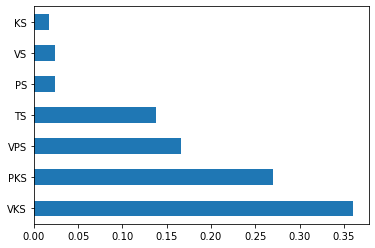

In [17]:
data.Dosha.value_counts(normalize=True).plot.barh()
plt.show()

### Step3 : Data Preparation

In [18]:
## Assessing the categorical variables

In [19]:
cat_cols = data.select_dtypes("object").columns
cat_cols

Index(['Name', 'Latin', 'Catogery', 'Guna1', 'Guna2', 'Rasa1', 'Rasa2',
       'Veerya', 'Vipaka', 'Dosha'],
      dtype='object')

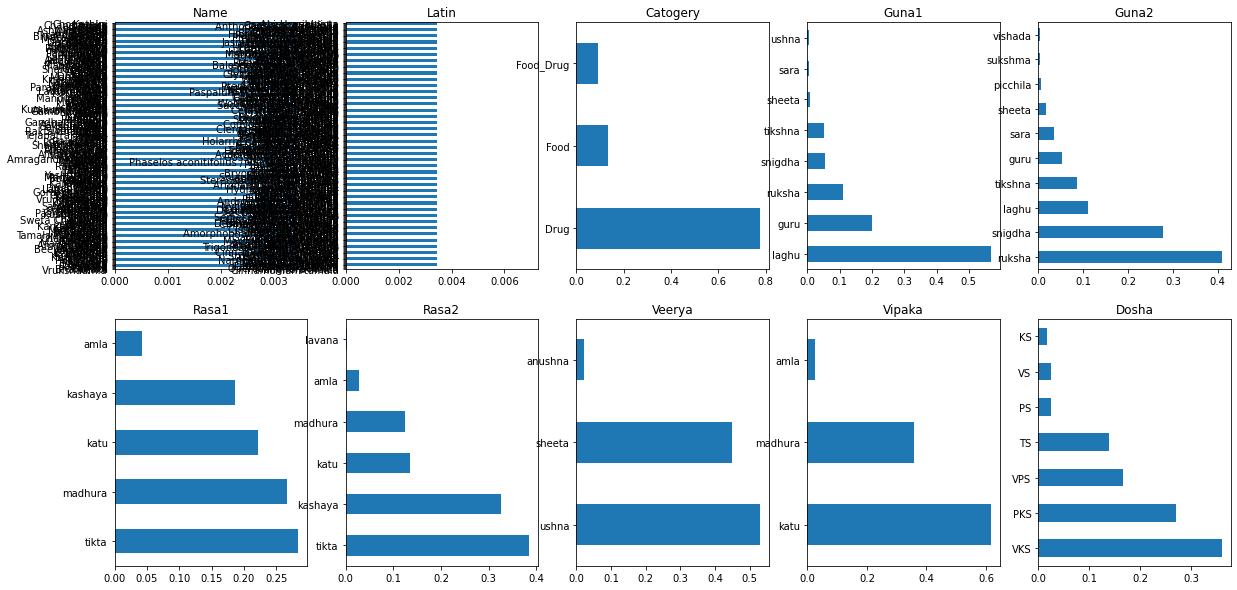

In [20]:
plt.figure(figsize=[20,10])
for ind, col in enumerate(cat_cols):
    plt.subplot(2,5,ind+1)
    data[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

In [21]:
data[col].value_counts(normalize=True)

VKS    0.359862
PKS    0.269896
VPS    0.166090
TS     0.138408
PS     0.024221
VS     0.024221
KS     0.017301
Name: Dosha, dtype: float64

#### Creating dummy variables for the categorical variables

In [22]:
dumm_cols = ['Guna1', 'Guna2', 'Rasa1', 'Rasa2', 'Vipaka', 'Veerya']

In [23]:
dravya_dummies = pd.get_dummies(data[dumm_cols], drop_first=True)

In [24]:
dravya_dummies.head()

Guna1_laghu  Guna1_ruksha  Guna1_sara  Guna1_sheeta  Guna1_snigdha  \
0            0             1           0             0              0   
1            0             0           0             0              0   
2            1             0           0             0              0   
3            1             0           0             0              0   
4            1             0           0             0              0   

   Guna1_tikshna  Guna1_ushna  Guna2_laghu  Guna2_picchila  Guna2_ruksha  ...  \
0              0            0            0               0             0  ...   
1              1            0            1               0             0  ...   
2              0            0            0               0             1  ...   
3              0            0            0               0             1  ...   
4              0            0            0               0             0  ...   

   Rasa1_tikta  Rasa2_kashaya  Rasa2_katu  Rasa2_lavana  Rasa2_madhura  \
0            0              1           0             0              0   
1            0              0           0             0              0   
2            1              1           0             0              0   
3            0              0           0             0              0   
4            1              1           0             0              0   

   Rasa2_tikta  Vipaka_katu  Vipaka_madhura  Veerya_sheeta  Veerya_ushna  
0            0            0               1              1             0  
1            1            1               0              0             1  
2            0            1               0              1             0  
3            1            1               0              0             1  
4            0            0               1              1             0  

[5 rows x 29 columns]

In [25]:
dravya_dummies.shape

(289, 29)

In [26]:
## Preparing final data by concating original data with dummy data set 

In [27]:
final_data = pd.concat([data, dravya_dummies], axis=1)

In [28]:
final_data.shape

(289, 40)

In [29]:
final_data.head()

No        Name                   Latin Catogery    Guna1    Guna2    Rasa1  \
0   1      Aadaki        Cajanus indicus      Food   ruksha   sheeta  madhura   
1   2       Agaru     Aquilaria agallocha     Drug  tikshna    laghu     katu   
2   3     Agastya    Sesbenia grandiflora     Drug    laghu   ruksha    tikta   
3   4  Agnimantha  Clerodendron phlomides     Drug    laghu   ruksha     katu   
4   5    Ahiphena      Papaver somniferum     Drug    laghu  sukshma    tikta   

     Rasa2  Veerya   Vipaka  ... Rasa1_tikta  Rasa2_kashaya  Rasa2_katu  \
0  kashaya  sheeta  madhura  ...           0              1           0   
1    tikta   ushna     katu  ...           0              0           0   
2  kashaya  sheeta     katu  ...           1              1           0   
3    tikta   ushna     katu  ...           0              0           0   
4  kashaya  sheeta  madhura  ...           1              1           0   

   Rasa2_lavana  Rasa2_madhura  Rasa2_tikta  Vipaka_katu  Vipaka_madhura  \
0             0              0            0            0               1   
1             0              0            1            1               0   
2             0              0            0            1               0   
3             0              0            1            1               0   
4             0              0            0            0               1   

   Veerya_sheeta  Veerya_ushna  
0              1             0  
1              0             1  
2              1             0  
3              0             1  
4              1             0  

[5 rows x 40 columns]

In [30]:
final_data = final_data.drop(dumm_cols,axis=1)

In [31]:
final_data.head()

No        Name                   Latin Catogery Dosha  Guna1_laghu  \
0   1      Aadaki        Cajanus indicus      Food   PKS            0   
1   2       Agaru     Aquilaria agallocha     Drug   VKS            0   
2   3     Agastya    Sesbenia grandiflora     Drug   PKS            1   
3   4  Agnimantha  Clerodendron phlomides     Drug   VKS            1   
4   5    Ahiphena      Papaver somniferum     Drug    PS            1   

   Guna1_ruksha  Guna1_sara  Guna1_sheeta  Guna1_snigdha  ...  Rasa1_tikta  \
0             1           0             0              0  ...            0   
1             0           0             0              0  ...            0   
2             0           0             0              0  ...            1   
3             0           0             0              0  ...            0   
4             0           0             0              0  ...            1   

   Rasa2_kashaya  Rasa2_katu  Rasa2_lavana  Rasa2_madhura  Rasa2_tikta  \
0              1           0             0              0            0   
1              0           0             0              0            1   
2              1           0             0              0            0   
3              0           0             0              0            1   
4              1           0             0              0            0   

   Vipaka_katu  Vipaka_madhura  Veerya_sheeta  Veerya_ushna  
0            0               1              1             0  
1            1               0              0             1  
2            1               0              1             0  
3            1               0              0             1  
4            0               1              1             0  

[5 rows x 34 columns]

In [32]:
final_data.describe()

No  Guna1_laghu  Guna1_ruksha  Guna1_sara  Guna1_sheeta  \
count  289.000000   289.000000    289.000000  289.000000    289.000000   
mean   145.000000     0.567474      0.110727    0.003460      0.006920   
std     83.571327     0.496286      0.314338    0.058824      0.083044   
min      1.000000     0.000000      0.000000    0.000000      0.000000   
25%     73.000000     0.000000      0.000000    0.000000      0.000000   
50%    145.000000     1.000000      0.000000    0.000000      0.000000   
75%    217.000000     1.000000      0.000000    0.000000      0.000000   
max    289.000000     1.000000      1.000000    1.000000      1.000000   

       Guna1_snigdha  Guna1_tikshna  Guna1_ushna  Guna2_laghu  Guna2_picchila  \
count     289.000000     289.000000   289.000000   289.000000      289.000000   
mean        0.055363       0.051903     0.003460     0.110727        0.006920   
std         0.229085       0.222216     0.058824     0.314338        0.083044   
min         0.000000       0.000000     0.000000     0.000000        0.000000   
25%         0.000000       0.000000     0.000000     0.000000        0.000000   
50%         0.000000       0.000000     0.000000     0.000000        0.000000   
75%         0.000000       0.000000     0.000000     0.000000        0.000000   
max         1.000000       1.000000     1.000000     1.000000        1.000000   

       ...  Rasa1_tikta  Rasa2_kashaya  Rasa2_katu  Rasa2_lavana  \
count  ...   289.000000     289.000000  289.000000    289.000000   
mean   ...     0.283737       0.325260    0.134948      0.003460   
std    ...     0.451593       0.469284    0.342261      0.058824   
min    ...     0.000000       0.000000    0.000000      0.000000   
25%    ...     0.000000       0.000000    0.000000      0.000000   
50%    ...     0.000000       0.000000    0.000000      0.000000   
75%    ...     1.000000       1.000000    0.000000      0.000000   
max    ...     1.000000       1.000000    1.000000      1.000000   

       Rasa2_madhura  Rasa2_tikta  Vipaka_katu  Vipaka_madhura  Veerya_sheeta  \
count     289.000000   289.000000   289.000000      289.000000     289.000000   
mean        0.124567     0.384083     0.615917        0.359862       0.449827   
std         0.330801     0.487221     0.487221        0.480792       0.498339   
min         0.000000     0.000000     0.000000        0.000000       0.000000   
25%         0.000000     0.000000     0.000000        0.000000       0.000000   
50%         0.000000     0.000000     1.000000        0.000000       0.000000   
75%         0.000000     1.000000     1.000000        1.000000       1.000000   
max         1.000000     1.000000     1.000000        1.000000       1.000000   

       Veerya_ushna  
count    289.000000  
mean       0.529412  
std        0.500000  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 30 columns]

In [33]:
final_data.corr()

No  Guna1_laghu  Guna1_ruksha  Guna1_sara  Guna1_sheeta  \
No              1.000000     0.024278     -0.026832   -0.090408      0.032520   
Guna1_laghu     0.024278     1.000000     -0.404180   -0.067495     -0.095618   
Guna1_ruksha   -0.026832    -0.404180      1.000000   -0.020793     -0.029457   
Guna1_sara     -0.090408    -0.067495     -0.020793    1.000000     -0.004919   
Guna1_sheeta    0.032520    -0.095618     -0.029457   -0.004919      1.000000   
Guna1_snigdha   0.024847    -0.277297     -0.085425   -0.014265     -0.020209   
Guna1_tikshna  -0.081706    -0.268002     -0.082562   -0.013787     -0.019532   
Guna1_ushna     0.026840    -0.067495     -0.020793   -0.003472     -0.004919   
Guna2_laghu    -0.036349    -0.404180      0.718872   -0.020793     -0.029457   
Guna2_picchila  0.047029    -0.095618     -0.029457   -0.004919     -0.006969   
Guna2_ruksha   -0.055609     0.384200     -0.293124   -0.048949     -0.069345   
Guna2_sara     -0.070802    -0.063998     -0.006472   -0.011156     -0.015804   
Guna2_sheeta    0.005089    -0.044853      0.037749   -0.007819     -0.011076   
Guna2_snigdha   0.087972    -0.021822     -0.218313   -0.036457      0.041640   
Guna2_sukshma  -0.098884     0.051444     -0.020793   -0.003472     -0.004919   
Guna2_tikshna   0.016820     0.119585     -0.030133    0.191485     -0.025689   
Guna2_vishada  -0.012714    -0.067495     -0.020793   -0.003472     -0.004919   
Rasa1_kashaya   0.055544     0.078058      0.028877   -0.028247     -0.040016   
Rasa1_katu      0.030466     0.129210     -0.028854   -0.031427     -0.044522   
Rasa1_madhura   0.057416    -0.311153     -0.013119   -0.035512      0.138515   
Rasa1_tikta    -0.063758     0.162165      0.022514    0.093623     -0.052541   
Rasa2_kashaya   0.022842    -0.005107      0.013928   -0.040912      0.031138   
Rasa2_katu     -0.077570    -0.002688      0.022000    0.149191     -0.032971   
Rasa2_lavana   -0.054386    -0.067495     -0.020793   -0.003472     -0.004919   
Rasa2_madhura   0.005526    -0.009075      0.100639   -0.022228     -0.031489   
Rasa2_tikta     0.044343     0.028869     -0.074605   -0.046532      0.019895   
Vipaka_katu     0.054150     0.186529      0.119948    0.046532     -0.105712   
Vipaka_madhura -0.034393    -0.189426     -0.126720   -0.044181      0.111338   
Veerya_sheeta  -0.002001    -0.081031      0.057754   -0.053282      0.008419   
Veerya_ushna    0.009473     0.072434     -0.042885    0.055556     -0.004919   

                Guna1_snigdha  Guna1_tikshna  Guna1_ushna  Guna2_laghu  \
No                   0.024847      -0.081706     0.026840    -0.036349   
Guna1_laghu         -0.277297      -0.268002    -0.067495    -0.404180   
Guna1_ruksha        -0.085425      -0.082562    -0.020793     0.718872   
Guna1_sara          -0.014265      -0.013787    -0.003472    -0.020793   
Guna1_sheeta        -0.020209      -0.019532    -0.004919    -0.029457   
Guna1_snigdha        1.000000      -0.056643    -0.014265     0.155668   
Guna1_tikshna       -0.056643       1.000000    -0.013787     0.066565   
Guna1_ushna         -0.014265      -0.013787     1.000000    -0.020793   
Guna2_laghu          0.155668       0.066565    -0.020793     1.000000   
Guna2_picchila       0.344822      -0.019532    -0.004919    -0.029457   
Guna2_ruksha        -0.201104      -0.035688    -0.048949    -0.293124   
Guna2_sara          -0.045833       0.126392     0.311247    -0.066805   
Guna2_sheeta        -0.032122      -0.031045    -0.007819    -0.046820   
Guna2_snigdha       -0.149779      -0.005308    -0.036457    -0.218313   
Guna2_sukshma       -0.014265      -0.013787    -0.003472    -0.020793   
Guna2_tikshna       -0.074498      -0.072001    -0.018133    -0.108587   
Guna2_vishada       -0.014265      -0.013787    -0.003472    -0.020793   
Rasa1_kashaya       -0.077232      -0.072142    -0.028247    -0.027702   
Rasa1_katu          -0.056236       0.250874    -0.031427    -0.002297   
Rasa1_madhura        0.162125 

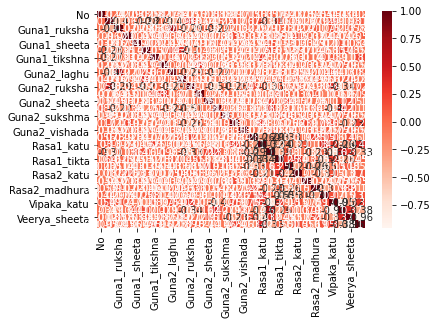

In [34]:
sns.heatmap(final_data.corr(), annot=True, cmap = 'Reds') 
plt.show()

# # step 4 Model building

#### Dividing into train and test datasets

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(final_data, test_size=0.2, random_state=42) 

In [37]:
df_train.shape, df_test.shape

((231, 34), (58, 34))

In [38]:
df_train.columns

Index(['No', 'Name', 'Latin', 'Catogery', 'Dosha', 'Guna1_laghu',
       'Guna1_ruksha', 'Guna1_sara', 'Guna1_sheeta', 'Guna1_snigdha',
       'Guna1_tikshna', 'Guna1_ushna', 'Guna2_laghu', 'Guna2_picchila',
       'Guna2_ruksha', 'Guna2_sara', 'Guna2_sheeta', 'Guna2_snigdha',
       'Guna2_sukshma', 'Guna2_tikshna', 'Guna2_vishada', 'Rasa1_kashaya',
       'Rasa1_katu', 'Rasa1_madhura', 'Rasa1_tikta', 'Rasa2_kashaya',
       'Rasa2_katu', 'Rasa2_lavana', 'Rasa2_madhura', 'Rasa2_tikta',
       'Vipaka_katu', 'Vipaka_madhura', 'Veerya_sheeta', 'Veerya_ushna'],
      dtype='object')

## Building predictive models

In [39]:
X_train = df_train.drop(['Dosha', 'No', 'Name', 'Latin', 'Catogery'], axis=1)
y_train = df_train['Dosha']
X_test = df_test.drop(['Dosha', 'No', 'Name', 'Latin', 'Catogery'], axis=1)
y_test = df_test['Dosha']

In [40]:
X_train.shape

(231, 29)

In [41]:
y_train.shape, y_test.shape

((231,), (58,))

In [42]:
X_train.shape

(231, 29)

In [43]:
X_train.columns

Index(['Guna1_laghu', 'Guna1_ruksha', 'Guna1_sara', 'Guna1_sheeta',
       'Guna1_snigdha', 'Guna1_tikshna', 'Guna1_ushna', 'Guna2_laghu',
       'Guna2_picchila', 'Guna2_ruksha', 'Guna2_sara', 'Guna2_sheeta',
       'Guna2_snigdha', 'Guna2_sukshma', 'Guna2_tikshna', 'Guna2_vishada',
       'Rasa1_kashaya', 'Rasa1_katu', 'Rasa1_madhura', 'Rasa1_tikta',
       'Rasa2_kashaya', 'Rasa2_katu', 'Rasa2_lavana', 'Rasa2_madhura',
       'Rasa2_tikta', 'Vipaka_katu', 'Vipaka_madhura', 'Veerya_sheeta',
       'Veerya_ushna'],
      dtype='object')

##creating Decision Tree graph

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
import sklearn

In [47]:
print(sklearn.tree.export_graphviz(dt, 
                 filled=True, rounded=True,
                 special_characters=True, feature_names = X_train.columns,
                 class_names=['VS', "PS", 'KS', 'TS', 'VPS', 'VKS', 'PKS'])) 

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Veerya_ushna &le; 0.5<br/>gini = 0.747<br/>samples = 231<br/>value = [3, 61, 7, 29, 86, 38, 7]<br/>class = VPS>, fillcolor="#e2e6fb"] ;
1 [label=<Rasa1_madhura &le; 0.5<br/>gini = 0.682<br/>samples = 108<br/>value = [0, 49, 7, 12, 4, 33, 3]<br/>class = PS>, fillcolor="#f0f9d5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Vipaka_madhura &le; 0.5<br/>gini = 0.475<br/>samples = 63<br/>value = [0, 44, 1, 9, 1, 8, 0]<br/>class = PS>, fillcolor="#d0ee7f"] ;
1 -> 2 ;
3 [label=<gini = 0.279<br/>samples = 43<br/>value = [0, 36, 0, 6, 0, 1, 0]<br/>class = PS>, fillcolor="#c5ea5e"] ;
2 -> 3 ;
4 [label=<gini = 0.69<br/>samples = 20<br/>value = [0, 8, 1, 3, 1, 7, 0]<br/>class = PS>, fillcolor="#f9fdf0"] ;
2 -> 4 ;
5 [label=<Guna2_snigdha &le; 0.5<br/>gini = 0.648<br/>samples = 45<br/>value = [0, 5, 6, 3, 3, 25, 3]<br/>class = VKS>, fillcol

In [48]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from six import StringIO 

In [49]:
# plotting tree with max_depth=6
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns, 
                class_names=['VS', "PS", 'KS', 'TS', 'VPS', 'VKS', 'PKS'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
Image(graph.create_png(),width=800,height=900)
graph.write_pdf("Dosha_Dravyas")

True

In [50]:
print(export_graphviz(dt, filled=True, rounded=True, special_characters=True,
               feature_names=X_train.columns, 
                 class_names=['VS', "PS", 'KS', 'TS', 'VPS', 'VKS', 'PKS']))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Veerya_ushna &le; 0.5<br/>gini = 0.747<br/>samples = 231<br/>value = [3, 61, 7, 29, 86, 38, 7]<br/>class = VPS>, fillcolor="#e2e6fb"] ;
1 [label=<Rasa1_madhura &le; 0.5<br/>gini = 0.682<br/>samples = 108<br/>value = [0, 49, 7, 12, 4, 33, 3]<br/>class = PS>, fillcolor="#f0f9d5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Vipaka_madhura &le; 0.5<br/>gini = 0.475<br/>samples = 63<br/>value = [0, 44, 1, 9, 1, 8, 0]<br/>class = PS>, fillcolor="#d0ee7f"] ;
1 -> 2 ;
3 [label=<gini = 0.279<br/>samples = 43<br/>value = [0, 36, 0, 6, 0, 1, 0]<br/>class = PS>, fillcolor="#c5ea5e"] ;
2 -> 3 ;
4 [label=<gini = 0.69<br/>samples = 20<br/>value = [0, 8, 1, 3, 1, 7, 0]<br/>class = PS>, fillcolor="#f9fdf0"] ;
2 -> 4 ;
5 [label=<Guna2_snigdha &le; 0.5<br/>gini = 0.648<br/>samples = 45<br/>value = [0, 5, 6, 3, 3, 25, 3]<br/>class = VKS>, fillcol

In [51]:
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Veerya_ushna <= 0.5\ngini = 0.747\nsamples = 231\nvalue = [3, 61, 7, 29, 86, 38, 7]\nclass = VPS", fillcolor="#e2e6fb"] ;
1 [label="Rasa1_madhura <= 0.5\ngini = 0.682\nsamples = 108\nvalue = [0, 49, 7, 12, 4, 33, 3]\nclass = PS", fillcolor="#f0f9d5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Vipaka_madhura <= 0.5\ngini = 0.475\nsamples = 63\nvalue = [0, 44, 1, 9, 1, 8, 0]\nclass = PS", fillcolor="#d0ee7f"] ;
1 -> 2 ;
3 [label="gini = 0.279\nsamples = 43\nvalue = [0, 36, 0, 6, 0, 1, 0]\nclass = PS", fillcolor="#c5ea5e"] ;
2 -> 3 ;
4 [label="gini = 0.69\nsamples = 20\nvalue = [0, 8, 1, 3, 1, 7, 0]\nclass = PS", fillcolor="#f9fdf0"] ;
2 -> 4 ;
5 [label="Guna2_snigdha <= 0.5\ngini = 0.648\nsamples = 45\nvalue = [0, 5, 6, 3, 3, 25, 3]\nclass = VKS", fillcolor="#d99ff2"] ;
1 -> 5 ;
6 [label="gini = 0.787\nsamples = 25\nvalue = [0,

Evaluating model performance

In [52]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [54]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.670995670995671


array([[ 0,  0,  0,  1,  2,  0,  0],
       [ 0, 44,  0,  0, 12,  5,  0],
       [ 0,  1,  0,  0,  0,  6,  0],
       [ 0,  9,  0,  4, 13,  3,  0],
       [ 0,  1,  0,  1, 79,  3,  2],
       [ 0,  8,  0,  0,  3, 25,  2],
       [ 0,  0,  0,  1,  0,  3,  3]], dtype=int64)

In [55]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6724137931034483


array([[ 0,  0,  1,  1,  0,  0],
       [ 0, 12,  0,  5,  0,  0],
       [ 0,  4,  1,  1,  3,  2],
       [ 0,  0,  0, 17,  0,  1],
       [ 0,  0,  1,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

Creating helper functions to evaluate model performance and help plot the decision tree

In [56]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns, 
                    class_names=['VS', "PS", 'KS', 'TS', 'VPS', 'VKS', 'PKS'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [57]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Without setting any hyper-parameters

In [58]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

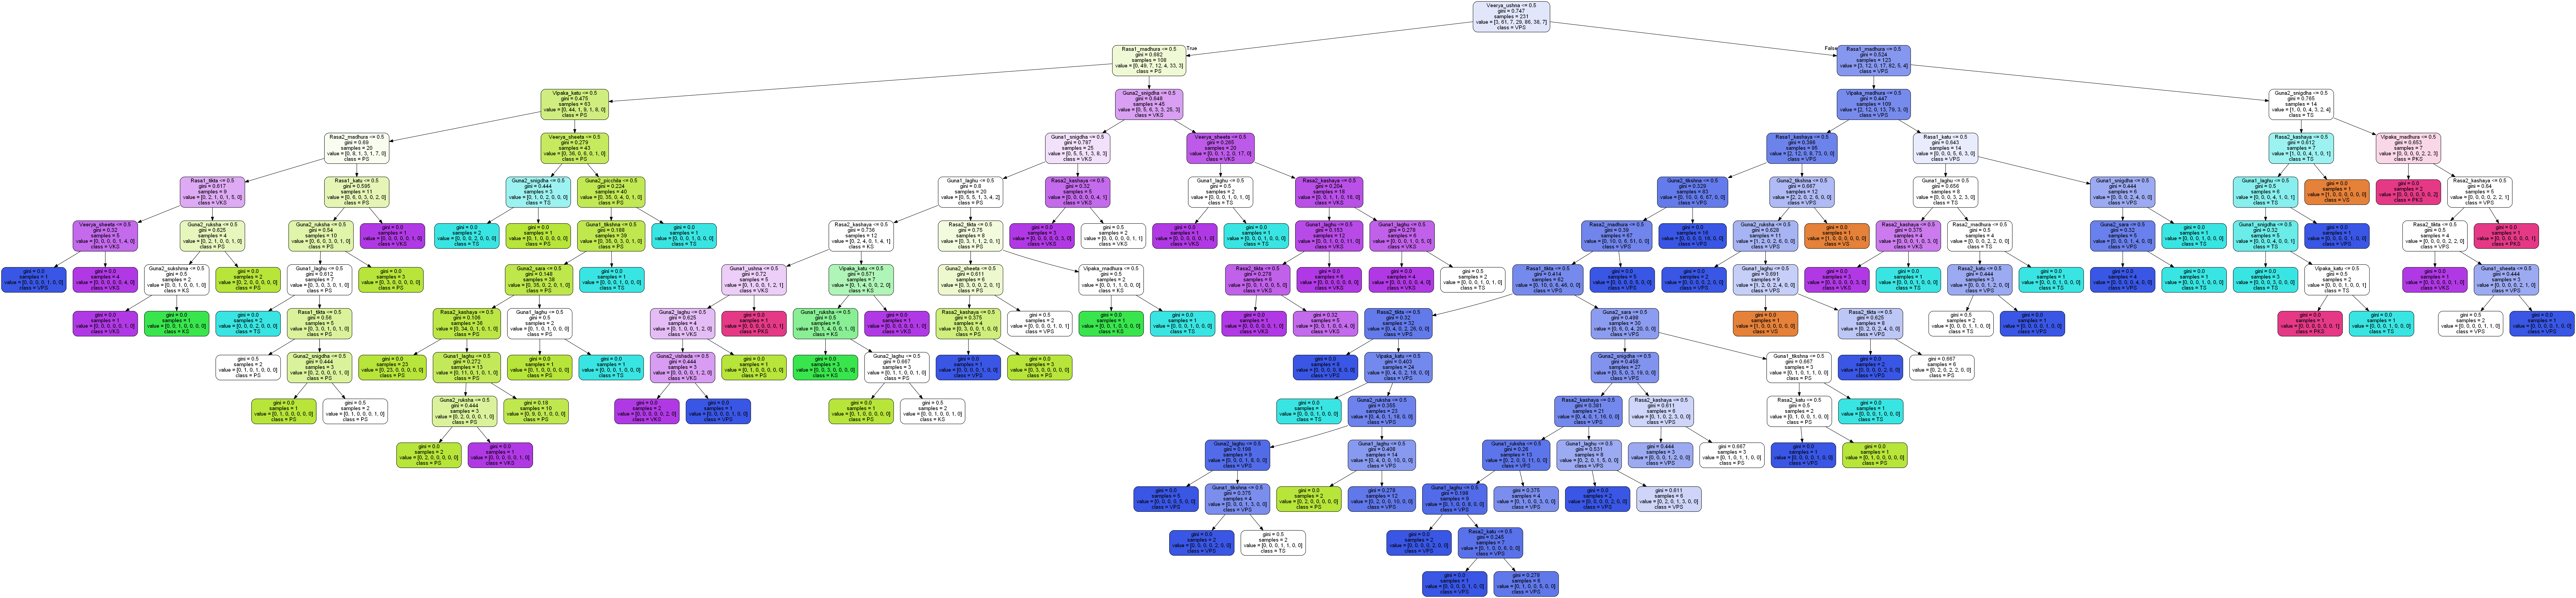

In [59]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [60]:
evaluate_model(dt_default)

Train Accuracy : 0.8917748917748918
Train Confusion Matrix:
[[ 3  0  0  0  0  0  0]
 [ 0 55  0  0  6  0  0]
 [ 0  0  6  0  0  1  0]
 [ 0  5  0 22  2  0  0]
 [ 0  3  0  2 81  0  0]
 [ 0  1  1  1  1 34  0]
 [ 0  0  0  0  1  1  5]]
--------------------------------------------------
Test Accuracy : 0.6551724137931034
Test Confusion Matrix:
[[ 1  0  0  1  0  0]
 [ 1 13  0  3  0  0]
 [ 0  2  2  2  4  1]
 [ 1  3  0 13  0  1]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  0  0]]


Controlling the depth of the tree

In [61]:
?DecisionTreeClassifier

In [62]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

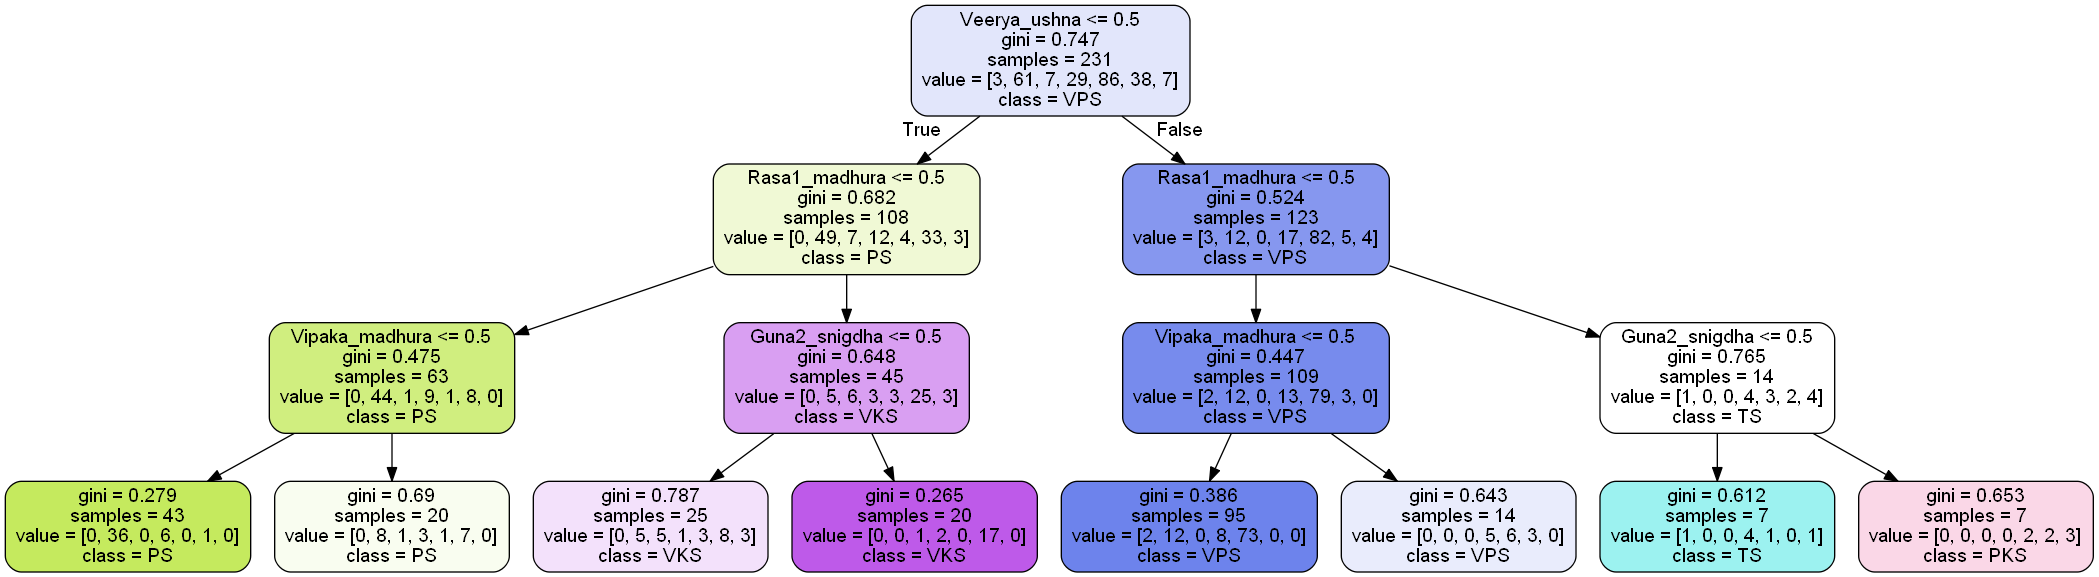

In [63]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

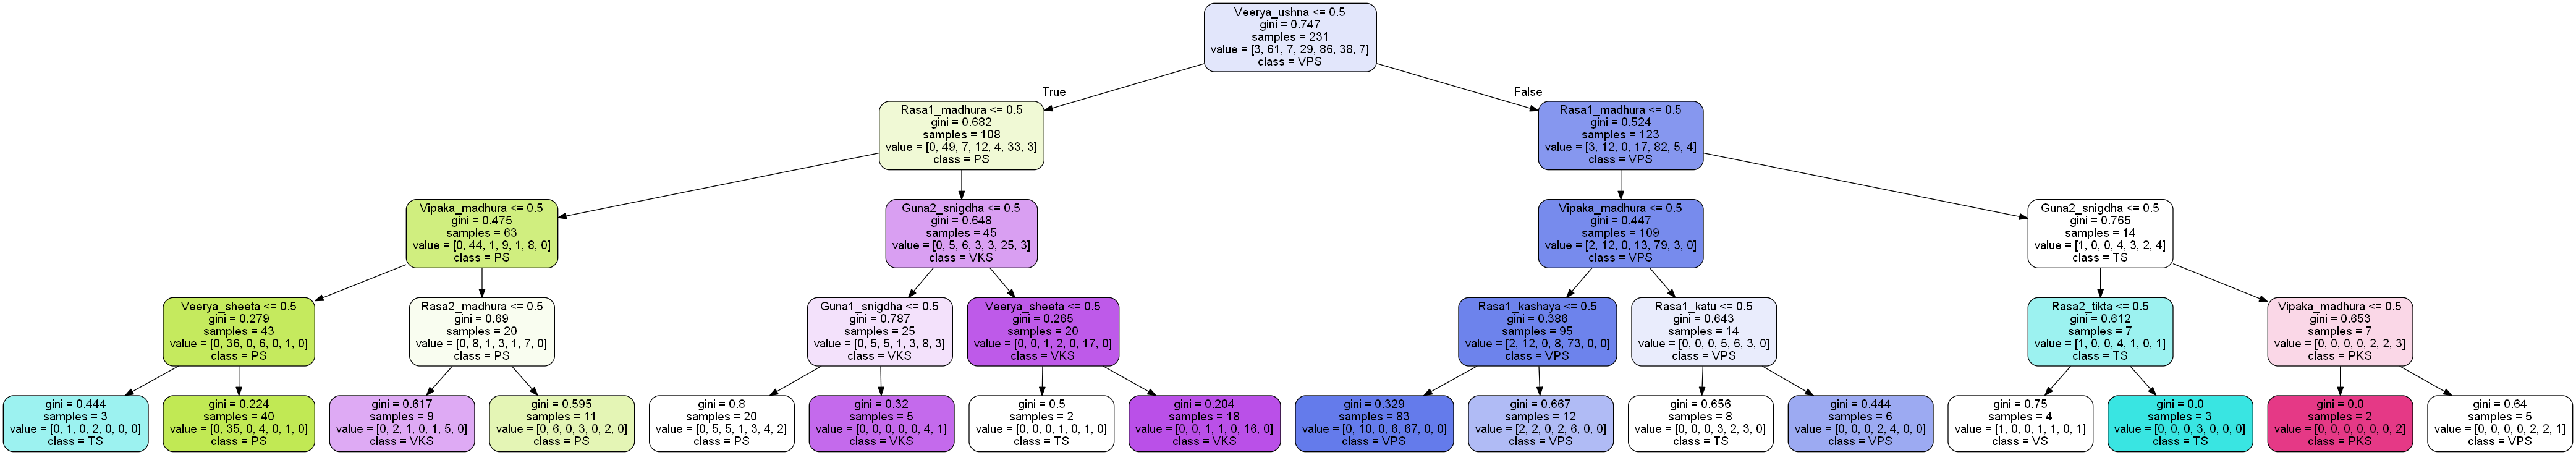

In [64]:
# lets check with 4 depth-
dt_depth = DecisionTreeClassifier(max_depth=4)
dt_depth.fit(X_train, y_train)
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [65]:
evaluate_model(dt_depth)

Train Accuracy : 0.7012987012987013
Train Confusion Matrix:
[[ 1  0  0  0  2  0  0]
 [ 0 46  0  1 12  2  0]
 [ 0  5  0  0  0  2  0]
 [ 1  8  0  9 10  1  0]
 [ 1  3  0  2 79  1  0]
 [ 0  7  0  4  2 25  0]
 [ 1  2  0  0  1  1  2]]
--------------------------------------------------
Test Accuracy : 0.7068965517241379
Test Confusion Matrix:
[[ 1  0  0  1  0]
 [ 0 12  0  5  0]
 [ 0  2  2  2  5]
 [ 0  0  0 18  0]
 [ 0  1  1  0  8]]


Specifying minimum samples before split

In [66]:
dt_min_split = DecisionTreeClassifier(min_samples_split=50)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=50)

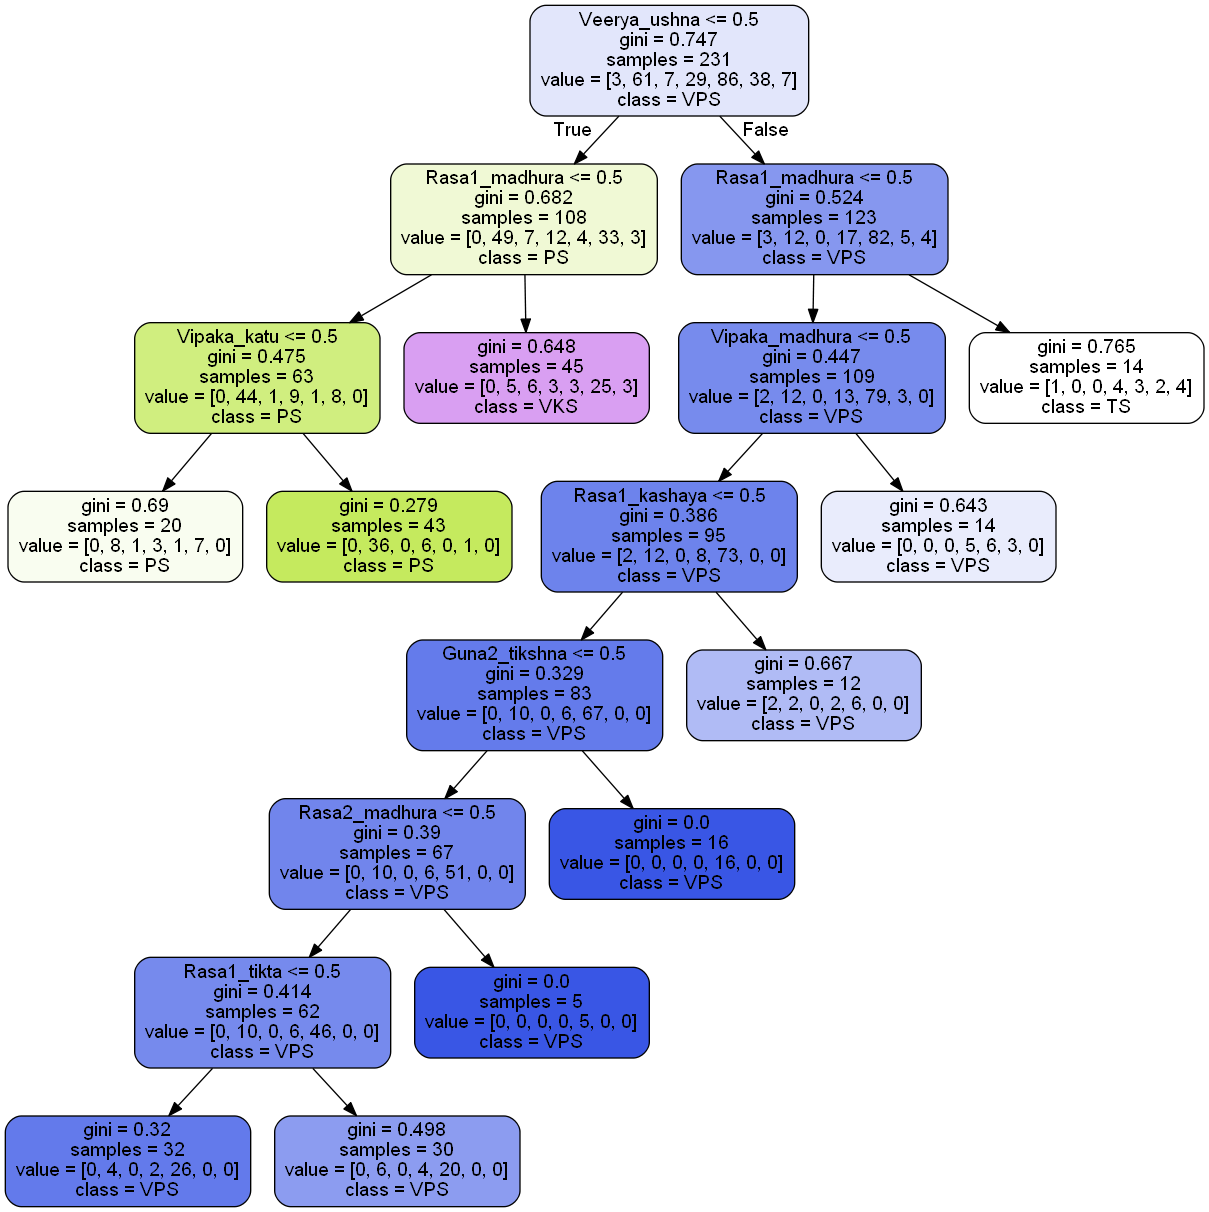

In [67]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [68]:
evaluate_model(dt_min_split)

Train Accuracy : 0.658008658008658
Train Confusion Matrix:
[[ 0  0  0  1  2  0  0]
 [ 0 44  0  0 12  5  0]
 [ 0  1  0  0  0  6  0]
 [ 0  9  0  4 13  3  0]
 [ 0  1  0  3 79  3  0]
 [ 0  8  0  2  3 25  0]
 [ 0  0  0  4  0  3  0]]
--------------------------------------------------
Test Accuracy : 0.7068965517241379
Test Confusion Matrix:
[[ 0  0  1  1  0]
 [ 0 12  0  5  0]
 [ 0  4  3  1  3]
 [ 0  0  1 17  0]
 [ 0  0  1  0  9]]


Specifying minimum samples in leaf node

In [69]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=25, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=25, random_state=42)

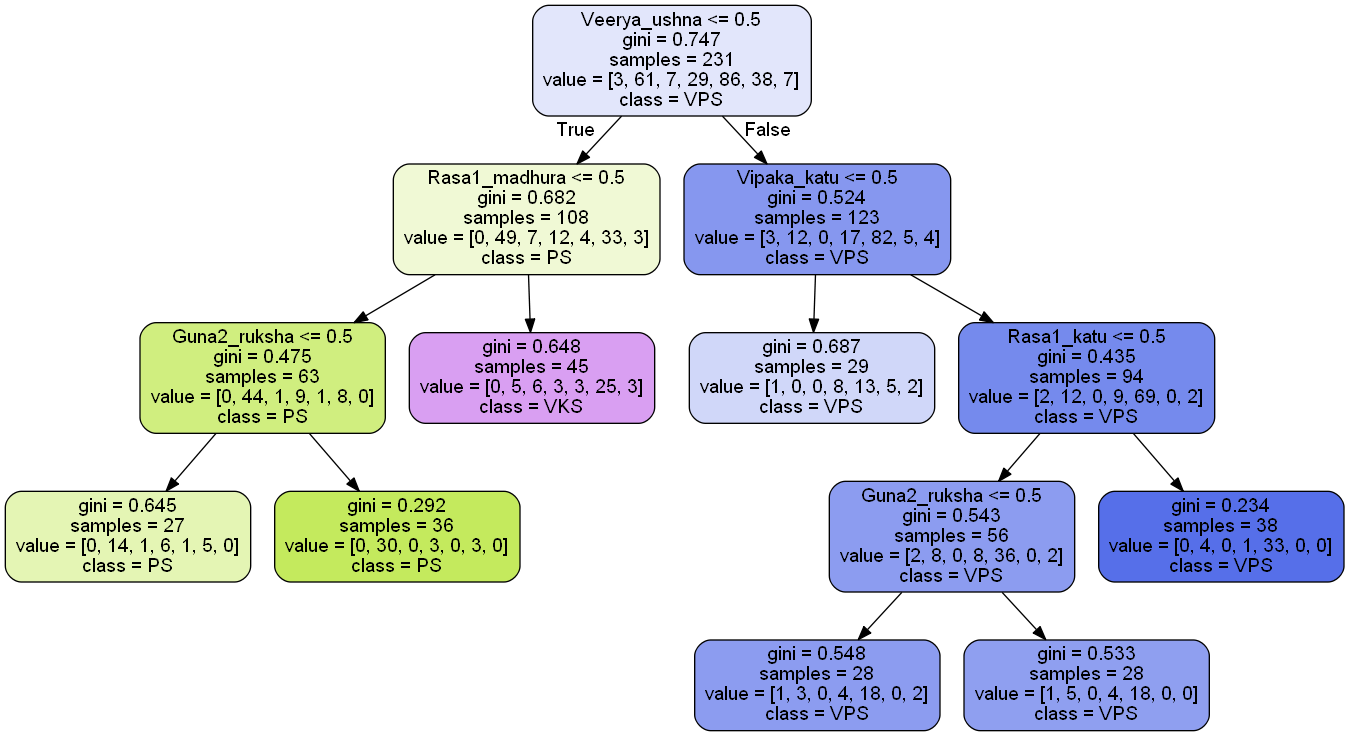

In [70]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [71]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.6536796536796536
Train Confusion Matrix:
[[ 0  0  0  0  3  0  0]
 [ 0 44  0  0 12  5  0]
 [ 0  1  0  0  0  6  0]
 [ 0  9  0  0 17  3  0]
 [ 0  1  0  0 82  3  0]
 [ 0  8  0  0  5 25  0]
 [ 0  0  0  0  4  3  0]]
--------------------------------------------------
Test Accuracy : 0.6724137931034483
Test Confusion Matrix:
[[ 0  0  0  2  0]
 [ 0 12  0  5  0]
 [ 0  4  0  4  3]
 [ 0  0  0 18  0]
 [ 0  0  0  1  9]]


Using Entropy instead of Gini

In [72]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=25, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25,
                       random_state=42)

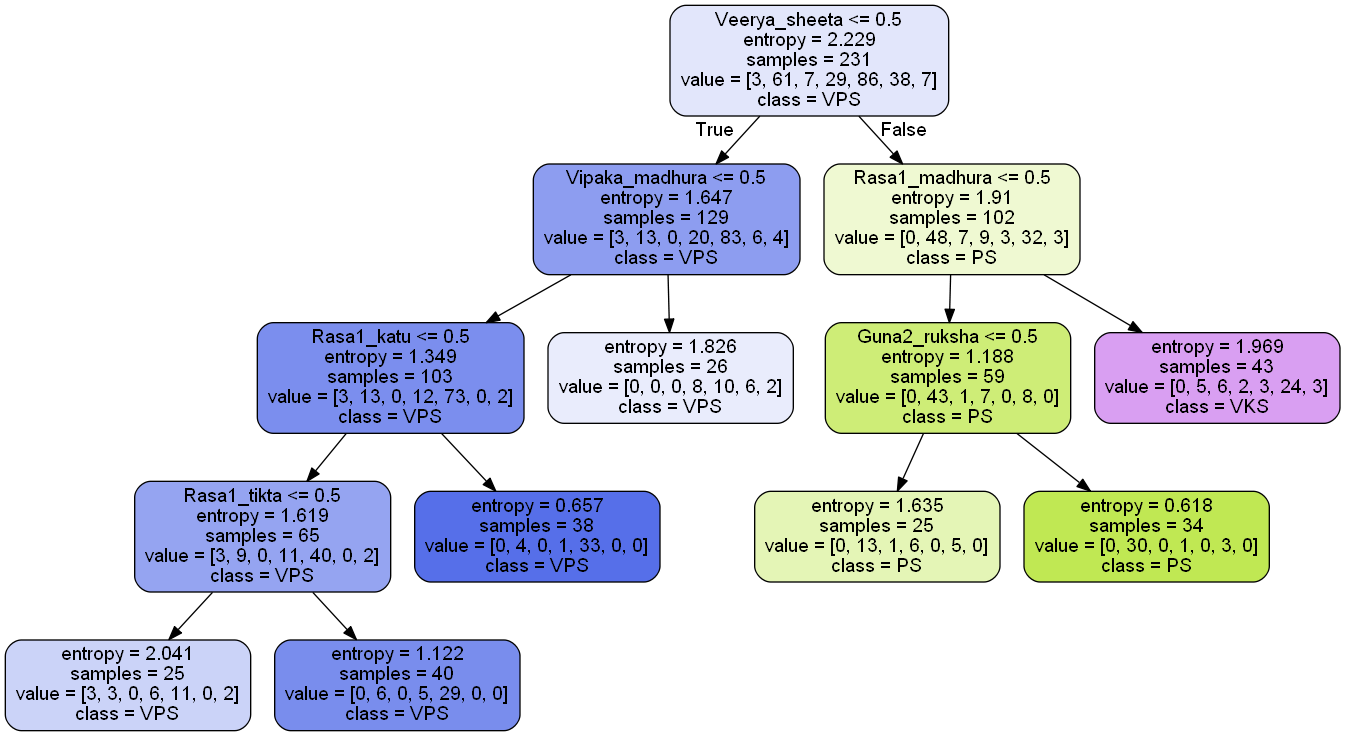

In [73]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [74]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.6493506493506493
Train Confusion Matrix:
[[ 0  0  0  0  3  0  0]
 [ 0 43  0  0 13  5  0]
 [ 0  1  0  0  0  6  0]
 [ 0  7  0  0 20  2  0]
 [ 0  0  0  0 83  3  0]
 [ 0  8  0  0  6 24  0]
 [ 0  0  0  0  4  3  0]]
--------------------------------------------------
Test Accuracy : 0.6724137931034483
Test Confusion Matrix:
[[ 0  0  0  2  0]
 [ 0 12  0  5  0]
 [ 0  4  0  4  3]
 [ 0  0  0 18  0]
 [ 0  0  0  1  9]]


Hyper-parameter tuning

In [75]:
dt = DecisionTreeClassifier(random_state=42)

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}

In [78]:
grid_search = GridSearchCV(estimator=dt, 
                       param_grid=params, 
                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [79]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [80]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Wall time: 3.05 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20]},
             scoring='accuracy', verbose=1)

In [81]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.012416      0.003972         0.001646        0.002851   
1       0.005819      0.003349         0.006881        0.000748   
2       0.014625      0.004333         0.002440        0.002654   
3       0.008215      0.002635         0.003750        0.002108   
4       0.010400      0.008920         0.004495        0.002691   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               3                      5   
4            gini               3                     10   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.637931   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.637931   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.620690   
3  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.637931   
4  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.637931   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.586207           0.689655           0.596491         0.627571   
1           0.586207           0.689655           0.596491         0.627571   
2           0.603448           0.689655           0.614035         0.631957   
3           0.568966           0.655172           0.596491         0.614640   
4           0.568966           0.672414           0.596491         0.618950   

   std_test_score  rank_test_score  
0        0.040739               13  
1        0.040739               13  
2        0.033875                2  
3        0.033915               20  
4        0.039438               19

In [82]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14       0.003979      0.004000         0.003969        0.003989   
2        0.014625      0.004333         0.002440        0.002654   
17       0.007817      0.007817         0.000000        0.000000   
20       0.003905      0.006764         0.003905        0.006764   
23       0.003905      0.006764         0.003905        0.006764   

   param_criterion param_max_depth param_min_samples_leaf  \
14         entropy               2                     20   
2             gini               2                     20   
17         entropy               3                     20   
20         entropy               5                     20   
23         entropy              10                     20   

                                               params  split0_test_score  \
14  {'criterion': 'entropy', 'max_depth': 2, 'min_...            0.62069   
2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.62069   
17  {'criterion': 'entropy', 'max_depth': 3, 'min_...            0.62069   
20  {'criterion': 'entropy', 'max_depth': 5, 'min_...            0.62069   
23  {'criterion': 'entropy', 'max_depth': 10, 'min...            0.62069   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
14           0.620690           0.689655           0.614035         0.636267   
2            0.603448           0.689655           0.614035         0.631957   
17           0.620690           0.672414           0.614035         0.631957   
20           0.620690           0.672414           0.614035         0.631957   
23           0.620690           0.672414           0.614035         0.631957   

    std_test_score  rank_test_score  
14        0.030943                1  
2         0.033875                2  
17        0.023515                2  
20        0.023515                2  
23        0.023515                2

In [83]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=20,
                       random_state=42)

In [84]:
dt_best = grid_search.best_estimator_

In [85]:
evaluate_model(dt_best)

Train Accuracy : 0.6493506493506493
Train Confusion Matrix:
[[ 0  0  0  0  3  0  0]
 [ 0 43  0  0 13  5  0]
 [ 0  1  0  0  0  6  0]
 [ 0  7  0  0 20  2  0]
 [ 0  0  0  0 83  3  0]
 [ 0  8  0  0  6 24  0]
 [ 0  0  0  0  4  3  0]]
--------------------------------------------------
Test Accuracy : 0.6724137931034483
Test Confusion Matrix:
[[ 0  0  0  2  0]
 [ 0 12  0  5  0]
 [ 0  4  0  4  3]
 [ 0  0  0 18  0]
 [ 0  0  0  1  9]]


In [86]:
from sklearn.metrics import classification_report

In [87]:
y_pred = dt_best.predict(X_train)

In [88]:
res = df_train
res['pred'] = y_pred

In [89]:
res.shape

(231, 35)

In [90]:
res[res.pred.isnull()]

Empty DataFrame
Columns: [No, Name, Latin, Catogery, Dosha, Guna1_laghu, Guna1_ruksha, Guna1_sara, Guna1_sheeta, Guna1_snigdha, Guna1_tikshna, Guna1_ushna, Guna2_laghu, Guna2_picchila, Guna2_ruksha, Guna2_sara, Guna2_sheeta, Guna2_snigdha, Guna2_sukshma, Guna2_tikshna, Guna2_vishada, Rasa1_kashaya, Rasa1_katu, Rasa1_madhura, Rasa1_tikta, Rasa2_kashaya, Rasa2_katu, Rasa2_lavana, Rasa2_madhura, Rasa2_tikta, Vipaka_katu, Vipaka_madhura, Veerya_sheeta, Veerya_ushna, pred]
Index: []

[0 rows x 35 columns]

In [91]:
res[['Name','Dosha','pred']].head(10)

Name Dosha pred
93       Jalajambuka   PKS  VPS
66           Draksha   VPS  VPS
63          Dhanyaka    TS  VKS
79           Guggulu    TS  VKS
25         Ashwattha   PKS  PKS
194         Parijata   VKS  VKS
146            Kusha    TS  PKS
72   Gandhaprasarini   VKS  VKS
19           Ardraka   VKS  VKS
281       Vatsanabha    TS  VKS

In [92]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

          KS       0.00      0.00      0.00         2
         PKS       0.75      0.71      0.73        17
          TS       0.00      0.00      0.00        11
         VKS       0.60      1.00      0.75        18
         VPS       0.75      0.90      0.82        10

    accuracy                           0.67        58
   macro avg       0.42      0.52      0.46        58
weighted avg       0.54      0.67      0.59        58



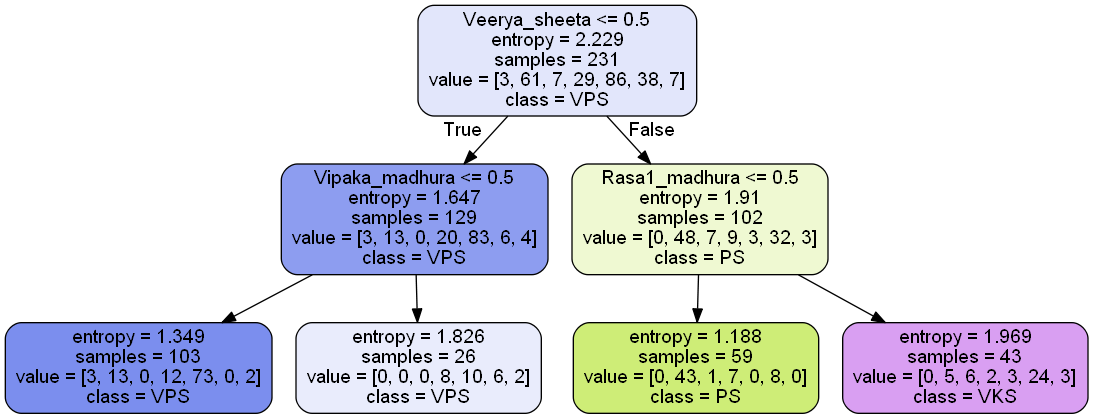

In [93]:
gph = get_dt_graph(dt_best)
Image(gph.create_png(), width=2000, height=2500)

## Image(gph.create_png(), width=900, height=1000)

In [94]:
## extracting some of the drugs based on certain above creteria-

In [95]:
A = X_train[X_train['Veerya_ushna'] < 0.5]

In [96]:
B= A[A['Rasa1_madhura']< 0.5]
C= B[B['Vipaka_katu']< 0.5]
D = C[C['Rasa2_kashaya']> 0.5]
D

Guna1_laghu  Guna1_ruksha  Guna1_sara  Guna1_sheeta  Guna1_snigdha  \
10             0             0           0             0              0   
119            0             0           0             0              1   
85             1             0           0             0              0   
41             1             0           0             0              0   
4              1             0           0             0              0   
207            1             0           0             0              0   
263            1             0           0             0              0   

     Guna1_tikshna  Guna1_ushna  Guna2_laghu  Guna2_picchila  Guna2_ruksha  \
10               0            0            0               0             0   
119              0            0            0               0             0   
85               0            0            0               0             1   
41               0            0            0               0             1   
4                0            0            0               0             0   
207              0            0            0               0             0   
263              0            0            0               0             0   

     ...  Rasa1_tikta  Rasa2_kashaya  Rasa2_katu  Rasa2_lavana  Rasa2_madhura  \
10   ...            0              1           0             0              0   
119  ...            0              1           0             0              0   
85   ...            1              1           0             0              0   
41   ...            1              1           0             0              0   
4    ...            1              1           0             0              0   
207  ...            0              1           0             0              0   
263  ...            1              1           0             0              0   

     Rasa2_tikta  Vipaka_katu  Vipaka_madhura  Veerya_sheeta  Veerya_ushna  
10             0            0               1              1             0  
119            0            0               1              1             0  
85             0            0               1              1             0  
41             0            0               1              1             0  
4              0            0               1              1             0  
207            0            0               1              0             0  
263            0            0               1              1             0  

[7 rows x 29 columns]

### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [99]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [100]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [101]:
sample_tree = rf.estimators_[4]

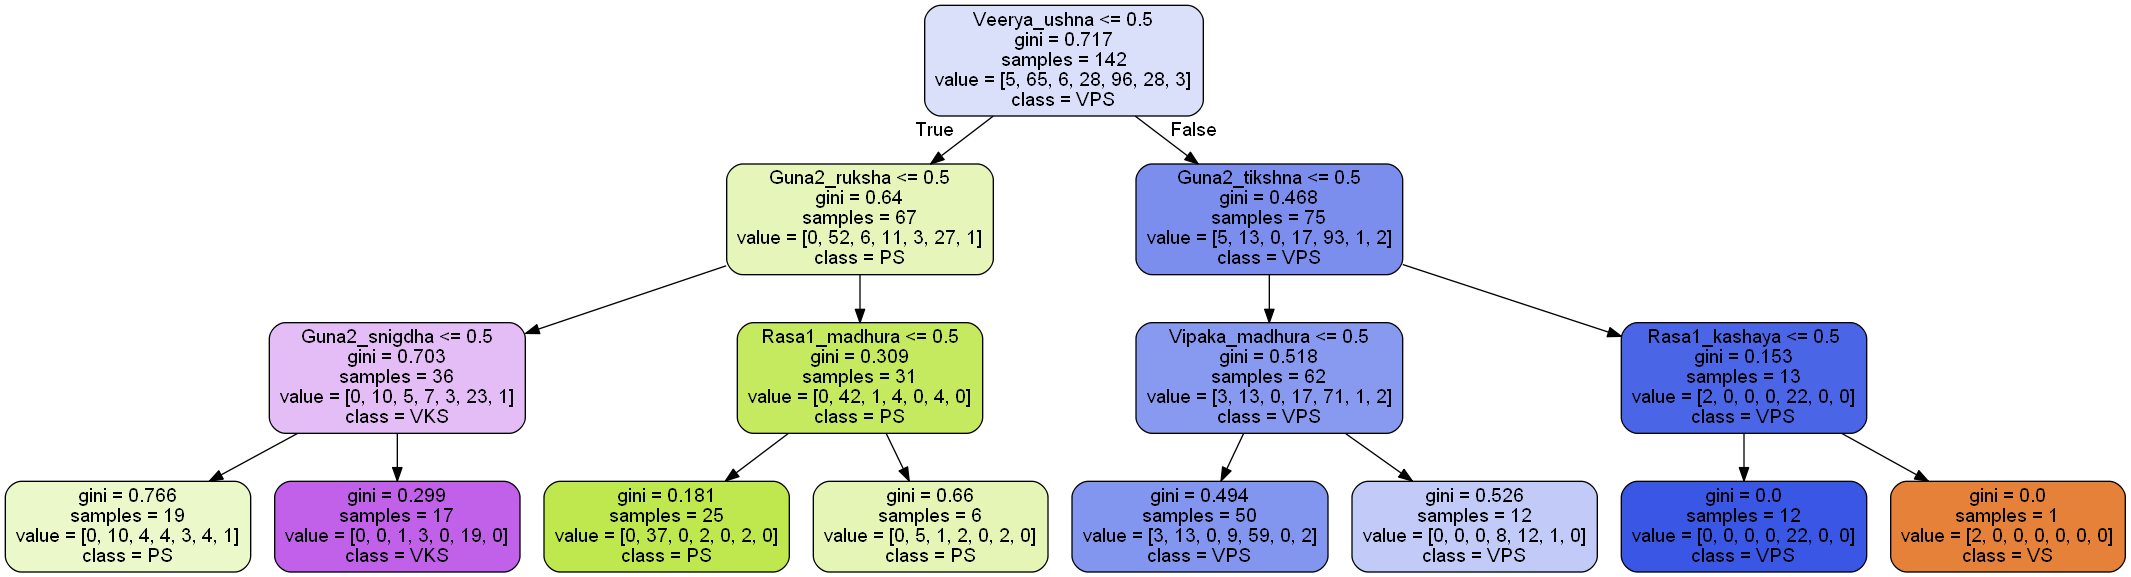

In [102]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=900, height=1000)

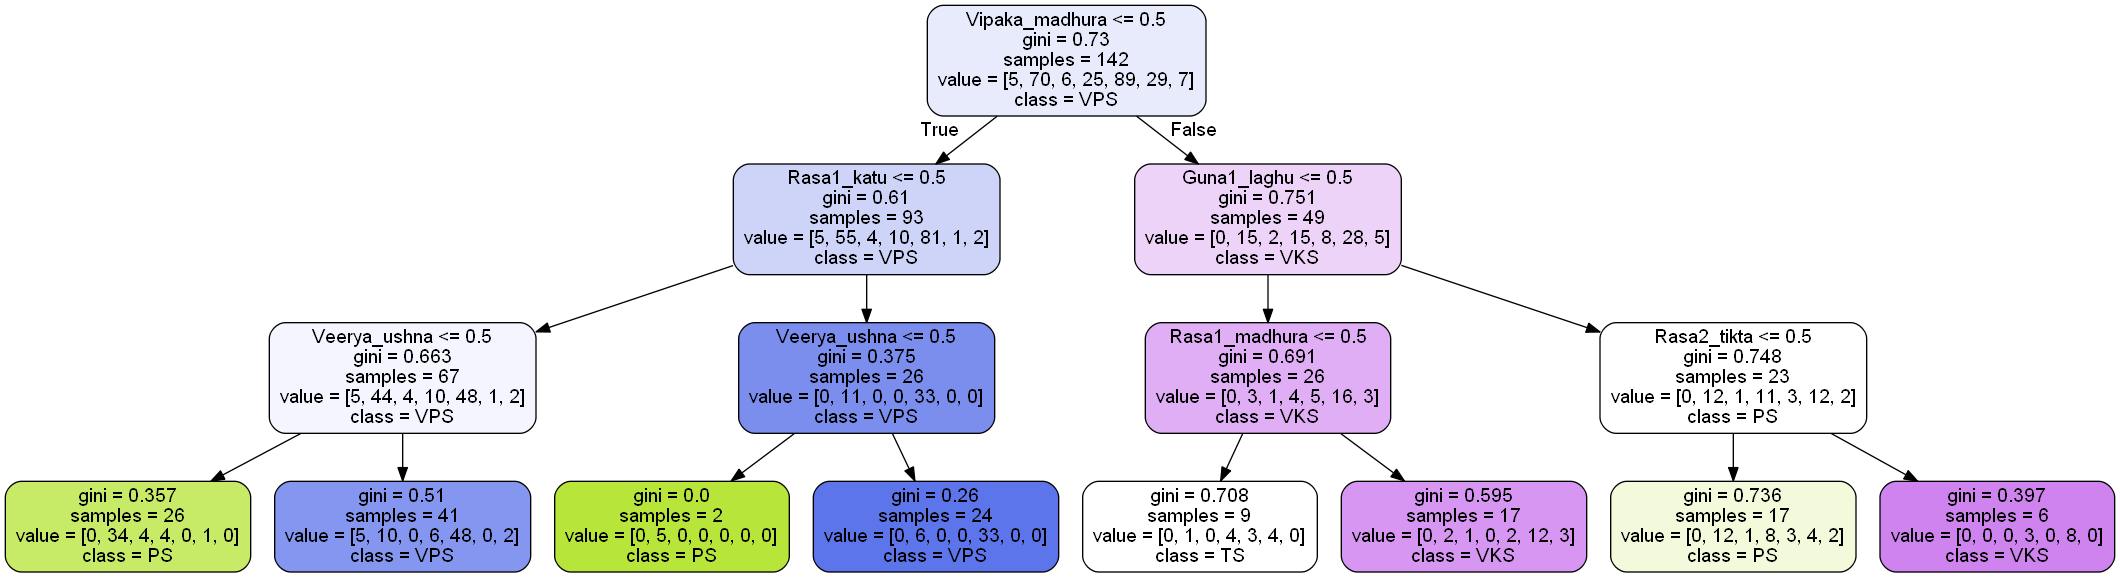

In [103]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=900, height=900)

OOB score

In [104]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3, oob_score=True)

In [105]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [106]:
rf.oob_score_

0.6493506493506493

In [107]:
evaluate_model(rf)

Train Accuracy : 0.670995670995671
Train Confusion Matrix:
[[ 0  0  0  0  3  0  0]
 [ 0 46  0  0 12  3  0]
 [ 0  2  0  0  0  5  0]
 [ 0  7  0  0 16  6  0]
 [ 0  1  0  0 82  3  0]
 [ 0  6  0  0  5 27  0]
 [ 0  0  0  0  3  4  0]]
--------------------------------------------------
Test Accuracy : 0.6206896551724138
Test Confusion Matrix:
[[ 0  0  0  2  0]
 [ 0 11  0  5  1]
 [ 0  2  0  3  6]
 [ 0  0  0 17  1]
 [ 0  1  0  1  8]]


Grid search for hyper-parameter tuning

In [108]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [109]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [110]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [111]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 135 candidates, totalling 540 fits
Wall time: 33.4 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [112]:
rf_best = grid_search.best_estimator_

In [113]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [114]:
evaluate_model(rf_best)

Train Accuracy : 0.6753246753246753
Train Confusion Matrix:
[[ 0  0  0  0  3  0  0]
 [ 0 47  0  0 13  1  0]
 [ 0  2  0  0  0  5  0]
 [ 0 10  0  0 16  3  0]
 [ 0  1  0  0 82  3  0]
 [ 0  7  0  0  4 27  0]
 [ 0  0  0  0  3  4  0]]
--------------------------------------------------
Test Accuracy : 0.6724137931034483
Test Confusion Matrix:
[[ 0  0  0  2  0]
 [ 0 12  0  5  0]
 [ 0  1  0  5  5]
 [ 0  0  0 18  0]
 [ 0  1  0  0  9]]


In [115]:
sample_tree = rf_best.estimators_[0]

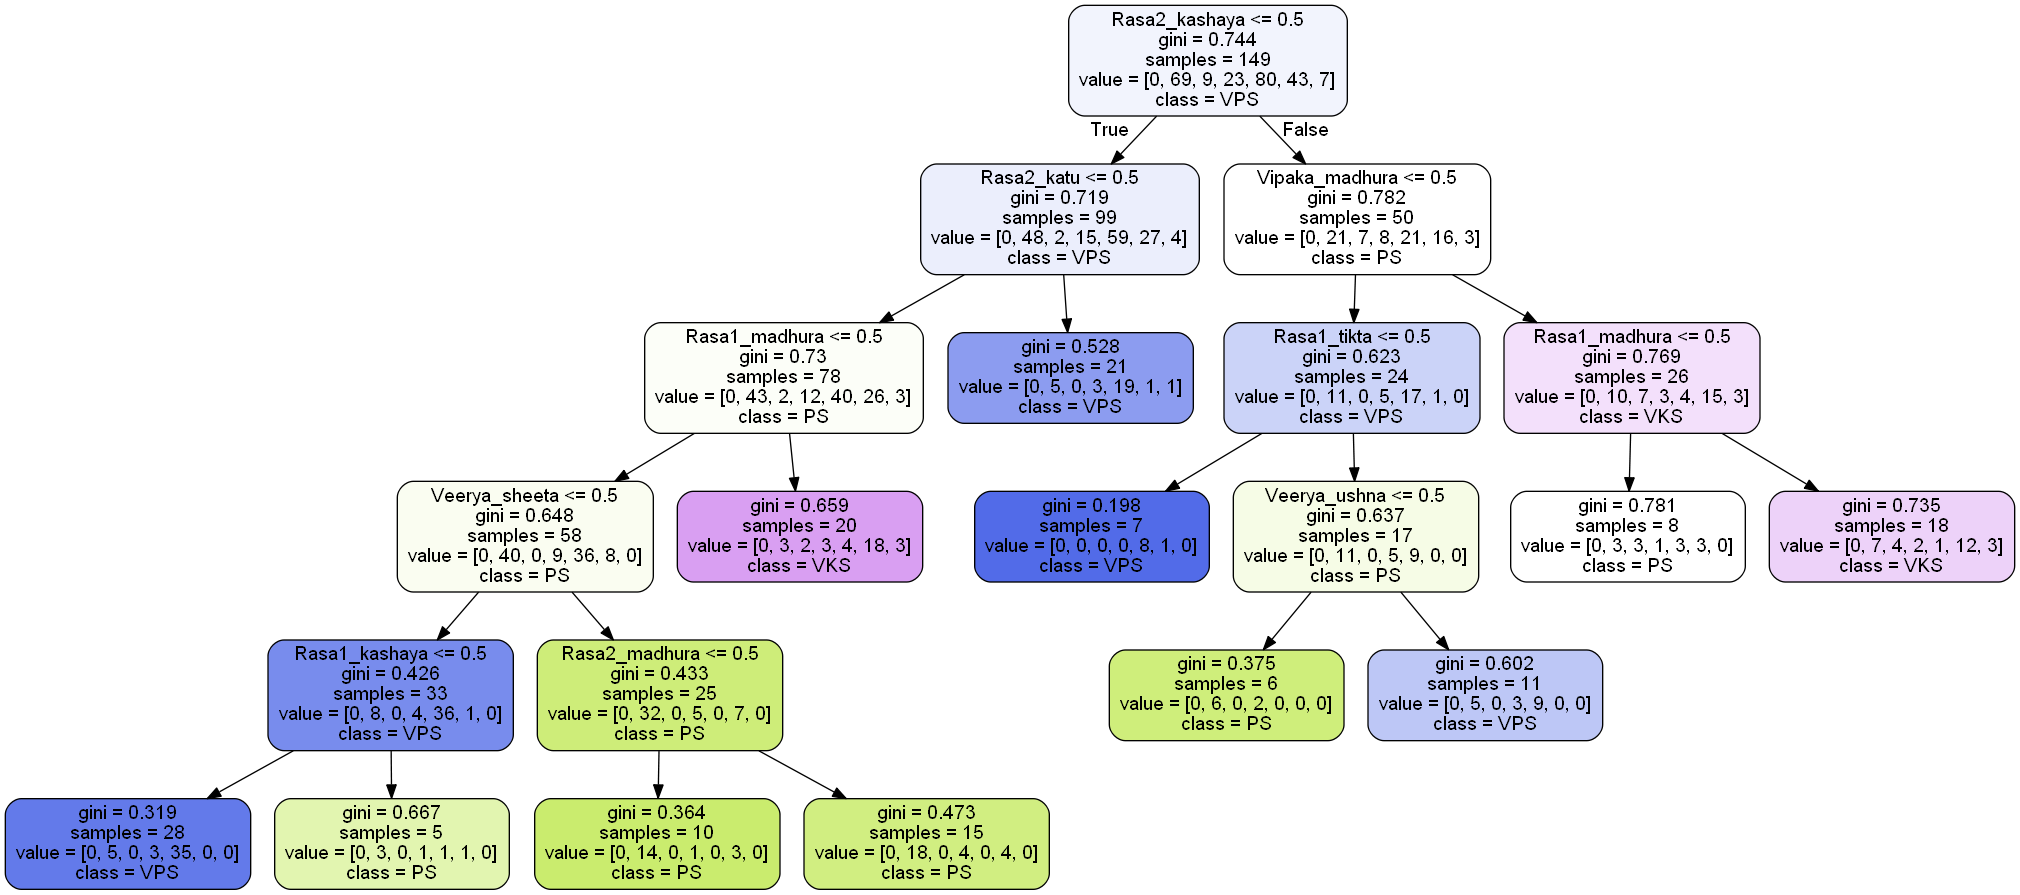

In [116]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

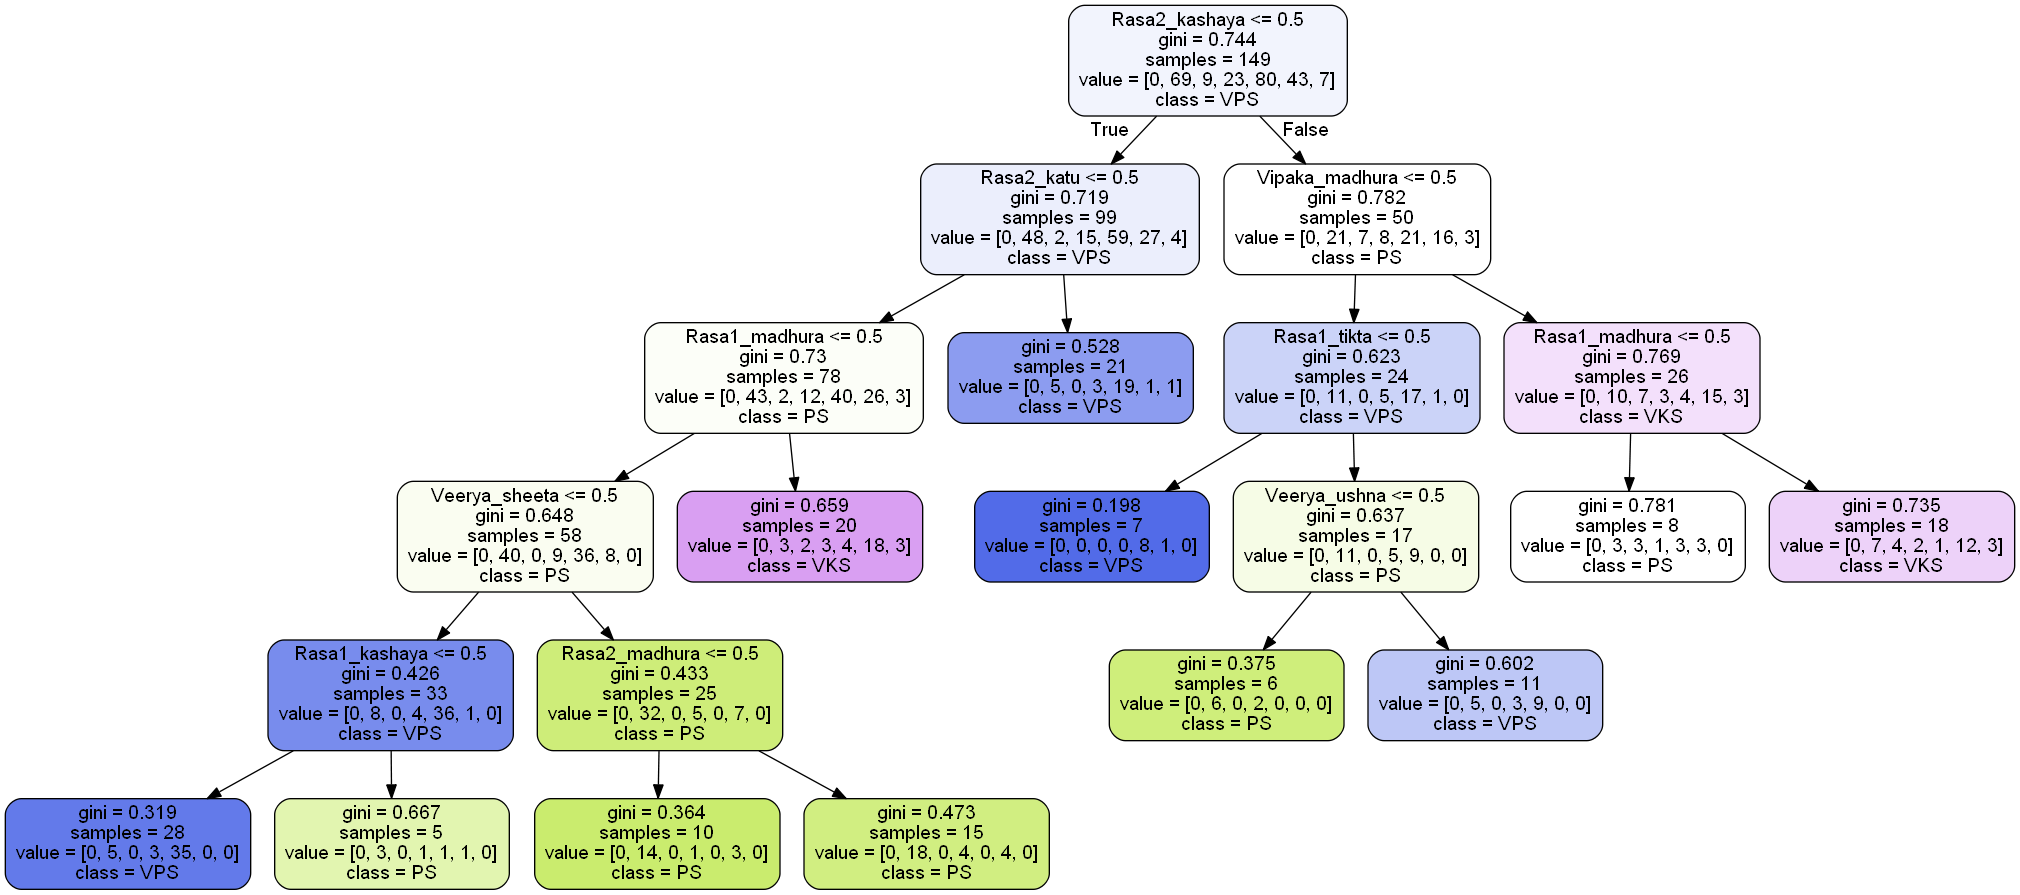

In [117]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=900, width=900)

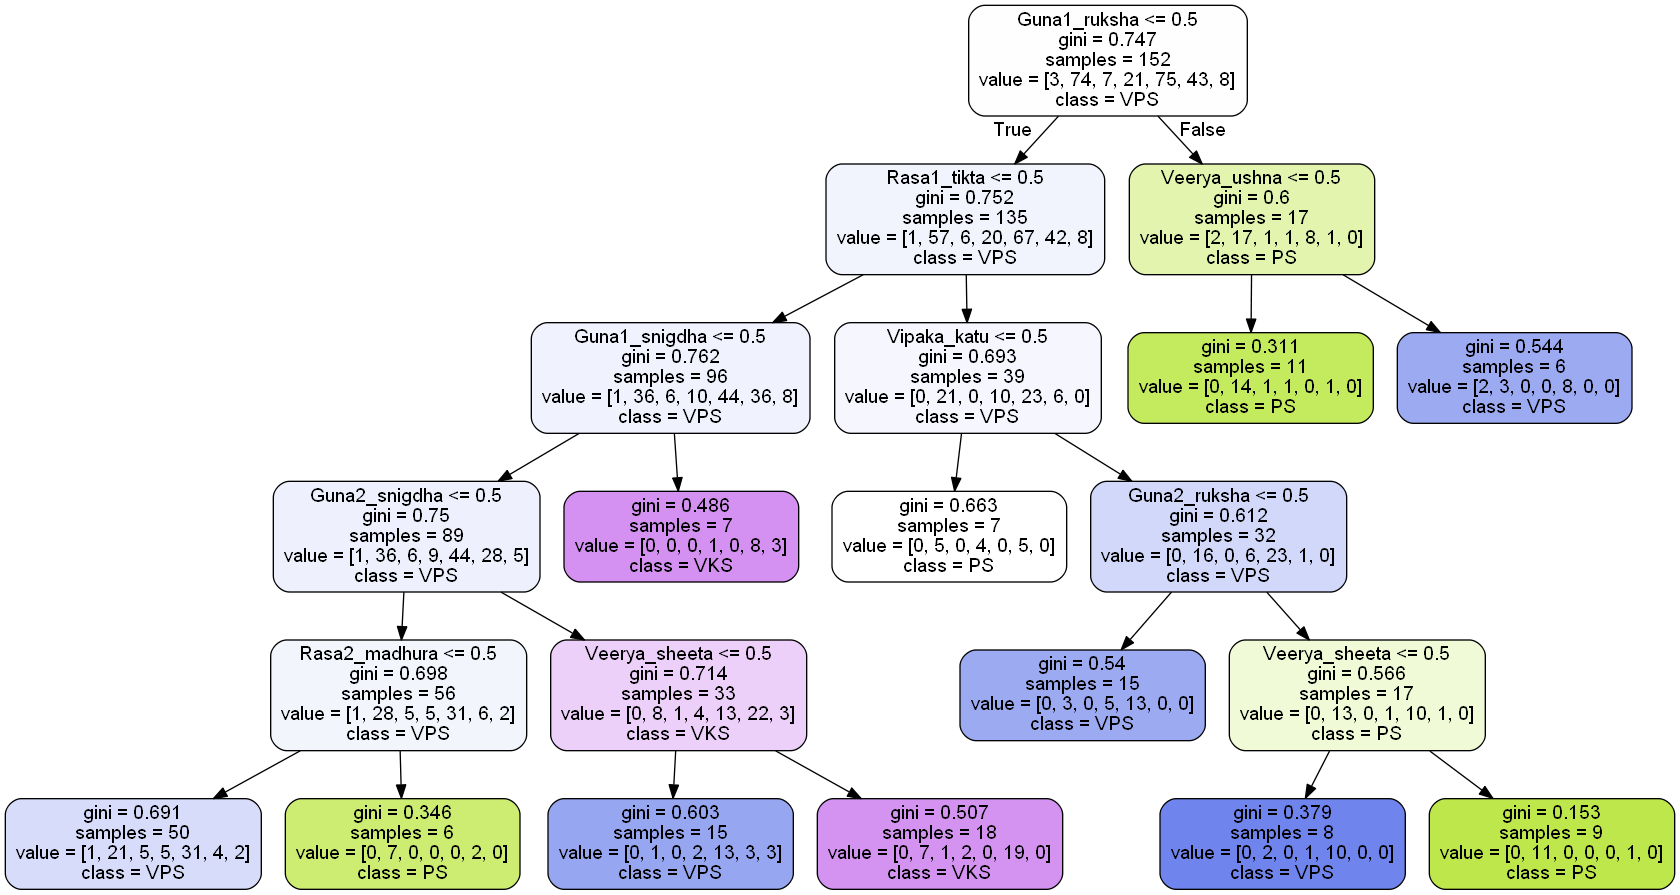

In [118]:
gph = get_dt_graph(rf_best.estimators_[7])
Image(gph.create_png(), height=900, width=900)

Variable importance in RandomForest and Decision trees

In [119]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [120]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [121]:
classifier_rf.feature_importances_

array([3.07041251e-02, 1.19674587e-02, 7.53543279e-05, 3.88704983e-03,
       1.90360437e-02, 9.24684985e-03, 2.98668535e-03, 7.29428949e-03,
       4.29902218e-03, 3.90837971e-02, 1.27596457e-02, 5.60717366e-03,
       5.37125590e-02, 1.76143079e-03, 1.54420916e-02, 4.12866006e-03,
       3.48532533e-02, 4.25816018e-02, 9.40300936e-02, 1.47928566e-02,
       1.90363908e-02, 1.47486501e-02, 4.32307094e-04, 2.56882934e-02,
       2.06593067e-02, 6.83488994e-02, 7.68090422e-02, 1.68352359e-01,
       1.97674710e-01])

In [122]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [123]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
28    Veerya_ushna  0.197675
27   Veerya_sheeta  0.168352
18   Rasa1_madhura  0.094030
26  Vipaka_madhura  0.076809
25     Vipaka_katu  0.068349
12   Guna2_snigdha  0.053713
17      Rasa1_katu  0.042582
9     Guna2_ruksha  0.039084
16   Rasa1_kashaya  0.034853
0      Guna1_laghu  0.030704
23   Rasa2_madhura  0.025688
24     Rasa2_tikta  0.020659
20   Rasa2_kashaya  0.019036
4    Guna1_snigdha  0.019036
14   Guna2_tikshna  0.015442
19     Rasa1_tikta  0.014793
21      Rasa2_katu  0.014749
10      Guna2_sara  0.012760
1     Guna1_ruksha  0.011967
5    Guna1_tikshna  0.009247
7      Guna2_laghu  0.007294
11    Guna2_sheeta  0.005607
8   Guna2_picchila  0.004299
15   Guna2_vishada  0.004129
3     Guna1_sheeta  0.003887
6      Guna1_ushna  0.002987
13   Guna2_sukshma  0.001761
22    Rasa2_lavana  0.000432
2       Guna1_sara  0.000075

In [124]:
## As per the above observation, Veerya plays important role (19+16=35%) in deciding the doshic action followed by Madhura Rasa (9%)

Comments: 
1. The same observation has been documented in the classical text books of Ayurveda. Veerya is considered as - "Utkrishtashaktisampannaguna" i.e. Highly powered qualities of any drug. 

2. Least importance has been give to 'Sara Guna' by the machine and even in the typical ayurvedic practice we see that Physicians gives least importance for the 'Sara Guna' while choosing any drug for Dosha reduction.